In [56]:
#Create Map Graph  
library (ggmap)
library (osmar)
library(prettymapr)

#Import data on Greater London
src <- osmsource_api ()

bb <- center_bbox(-0.091397, 51.514695, 400, 400)
# bb <- osmar::corner_bbox(-0.1430397, 51.5265924, -0.1214227, 51.5400746)
ua <- osmar::get_osm(bb, source = src)
#The osmdata contains an osmar object, which has all the 'nodes' and 'ways' associated with the data.
#Two ways of visualizing
# osmar::plot_nodes(ua)
# osmar::plot_ways(ua, add=T)

In [57]:
#Subset the data such that we only have data associated with the roads
hways_data <- subset(ua, way_ids = find(ua, way(tags(k == "highway"))))
hways <- find(hways_data, way(tags(k == "name")))
hways <- find_down(ua, way(hways))
hways_data <- subset(ua, ids = hways)
# plot(hways_data)

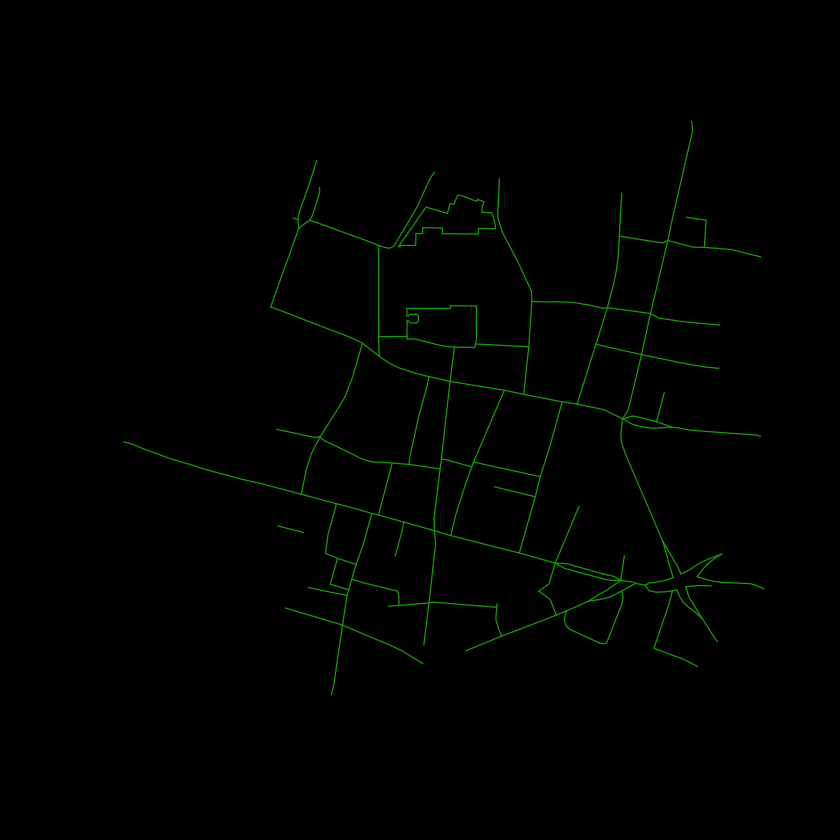

In [58]:
#visualization

par(bg = "black")
osmar::plot_ways(hways_data, col="#01AA00", bg ='green')
# osmar::plot_nodes(hways_data, pch=19, cex=0.1, add=T, col="red")

In [59]:
getwd()

[1] "/Users/soma/Desktop/CLASS/GIS/FINAL_COURSEWORK/OSM_ver"

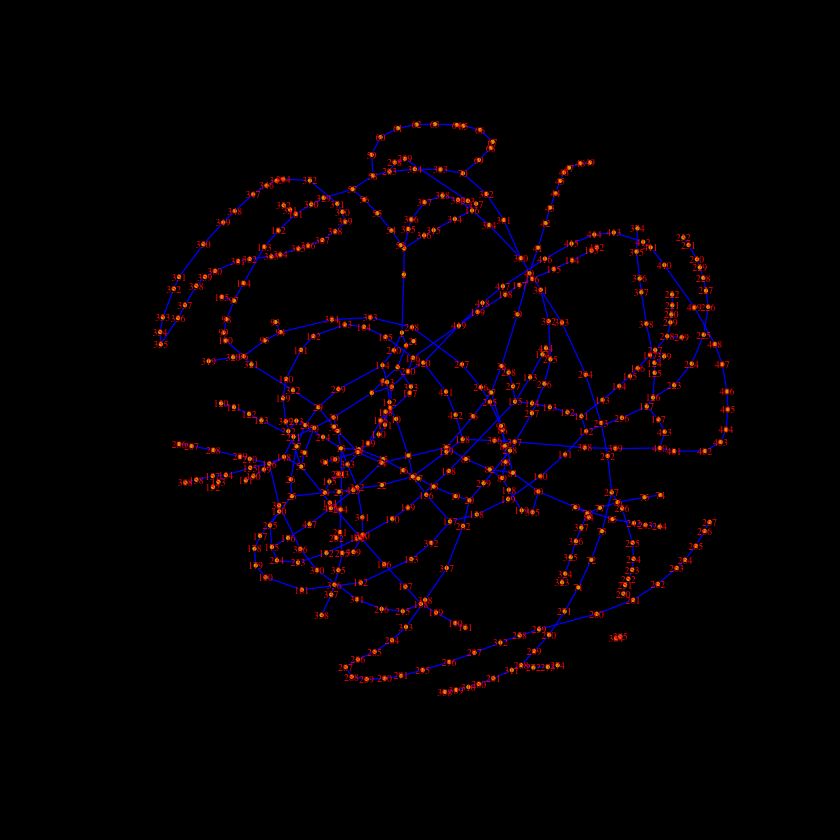

In [60]:
#convert to igraph
par(bg = "black")
hways_graph = as_igraph(hways_data)
hways_graph = as.undirected(hways_graph)
V(hways_graph)$name <- 1:length(V(hways_graph))
plot(hways_graph, vertex.size=2, edge.color="blue", vertex.label.color="red",vertex.label.cex=0.5)
jpeg('igraph.jpg')
# vertex.label=NA

In [61]:
adjacent_vertices(hways_graph, 297)

$`297`
+ 2/427 vertices, named, from 024518e:
[1] 296 312


In [62]:
#Let's get the trace data
library(plotKML)
library(urltools)
library(rgdal)

url = "http://api.openstreetmap.org/api/0.6/trackpoints?bbox=12&page=pagenumber"
mat = matrix(bb)[,1]
val = capture.output(mat[])
url <- param_set(url, key = "bbox", value = "-0.1430397,51.5265924,-0.1214227,51.5400746")
setwd("data")
for (i in 0:20){
    url <- param_set(url, key = "page", value = i)
    filename <- paste(i,"trace_data.gpx")
    download.file(url, destfile=filename)
}
files <- dir(pattern = "\\.gpx")
setwd("../")
#Read in GPX files that are located in the working directory

In [63]:
for (i in 1:length(files)){
    setwd("data")
    route <- readOGR(files[i], "tracks")
    coordinates = coordinates(route)
    setwd("../trace")
    for (j in 1:length(coordinates)) {
        for (k in 1:length(coordinates[[j]])) {
            coor = coordinates(route)[[j]][[k]]
#             index <- 0 : nrow(coor)
            latitude <- coor[,2]
            longitude <- coor[,1]
            routes <- data.frame(cbind(latitude, longitude))
            filename <- paste(i, j, k, "trace_data.csv")
            write.csv(routes, filename)
        }
    }
    setwd("../")
}

OGR data source with driver: GPX 
Source: "0 trace_data.gpx", layer: "tracks"
with 8 features
It has 12 fields
OGR data source with driver: GPX 
Source: "1 trace_data.gpx", layer: "tracks"
with 4 features
It has 12 fields
OGR data source with driver: GPX 
Source: "10 trace_data.gpx", layer: "tracks"
with 3 features
It has 12 fields
OGR data source with driver: GPX 
Source: "11 trace_data.gpx", layer: "tracks"
with 30 features
It has 12 fields
OGR data source with driver: GPX 
Source: "12 trace_data.gpx", layer: "tracks"
with 23 features
It has 12 fields
OGR data source with driver: GPX 
Source: "13 trace_data.gpx", layer: "tracks"
with 7 features
It has 12 fields
OGR data source with driver: GPX 
Source: "14 trace_data.gpx", layer: "tracks"
with 8 features
It has 12 fields
OGR data source with driver: GPX 
Source: "15 trace_data.gpx", layer: "tracks"
with 12 features
It has 12 fields
OGR data source with driver: GPX 
Source: "16 trace_data.gpx", layer: "tracks"
with 1 features
It has 1

In [65]:
map <- qmap(location = c(left = -0.1430397, bottom = 51.5265924, right = -0.1214227, top=51.5400746), zoom =15, color = 'bw')
setwd("trace/")
traces <- dir(pattern = "\\.csv")
for (i in 1:length(traces)){
    trace <- read.csv(traces[i])
    map <- map + geom_path(aes(x = longitude, y = latitude), colour="#01AA00", data = trace, alpha=0.3)
}
setwd("../")

Warning message:
“bounding box given to google - spatial extent only approximate.”converting bounding box to center/zoom specification. (experimental)
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=51.533333,-0.132231&zoom=15&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”

In [52]:
getwd()

[1] "/Users/soma/Desktop/CLASS/GIS/FINAL_COURSEWORK/OSM_ver"

In [66]:
png(filename="image/map.JPG")
map
dev.off()

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path:

pdf 
  2

In [50]:
library(curl)
req <- curl_fetch_memory("http://router.project-osrm.org/route/v1/driving/13.388860,52.517037;13.397634,52.529407;13.428555,52.523219?overview=false")
str(req)

List of 6
 $ url        : chr "http://router.project-osrm.org/route/v1/driving/13.388860,52.517037;13.397634,52.529407;13.428555,52.523219?overview=false"
 $ status_code: int 200
 $ headers    : raw [1:505] 48 54 54 50 ...
 $ modified   : POSIXct[1:1], format: NA
 $ times      : Named num [1:6] 0 0.227 0.233 0.233 0.264 ...
  ..- attr(*, "names")= chr [1:6] "redirect" "namelookup" "connect" "pretransfer" ...
 $ content    : raw [1:783] 7b 22 72 6f ...


ERROR: Error in ogrInfo(dsn = dsn, layer = layer, encoding = encoding, use_iconv = use_iconv, : Cannot open data source
